<a href="https://colab.research.google.com/github/ruizz04/Vision_Computador/blob/main/P1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visión por Computador - Práctica 1 - Filtrado de Imágenes

#### 13 puntos   |   Fecha de entrega: 02 de Noviembre de 2025, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2526.ugr.es/

### Estudiante: <mark>Pedro Ruiz Castaño</mark>



---

## Normas de desarrollo y entrega de la práctica

1. Para este trabajo, al igual que para los demás, se debe presentar código, resultados, discusión de los mismos, y presentación y análisis del trabajo realizado, todo integrado en el propio Google Colab Notebook (es decir, no se entrega ninguna memoria separada en `.pdf` ni ningún código `.py`). Se recuerda que código y resultados sin informe explicativo no puntúa. Resulta también fundamental recordar que solo se acepta la entrega de ficheros `.ipynb` (no resulta válido entregar un fichero `.py`).

2. En relación con el punto anterior, se recuerda que se proporciona un Notebook, denominado `Ejemplo_Otsu.ipynb`, que muestra un ejemplo de respuesta y solución a un potencial ejercicio. El propósito de este Notebook es servir de referencia al alumnado acerca de cómo responder los ejercicios planteados. Véase que, por ejemplo, en aras de diferenciar con facilidad enunciados y respuestas, estas últimas se presentan en otro color (azul, en ese caso).

3. El diseño de celdas del documento debe ser respetado. Es decir, no se puede modificar el orden de los ejercicios o alterar la estructura del Notebook, de forma que dificulte localizar los contenidos. Aunque sí se puede, por ejemplo, crear nuevas subsecciones dentro de las secciones ya existentes para estructurar y organizar con más claridad las respuestas, así como para incluir los experimentos extra que se deseen.

4. Tal y como se muestra en `Ejemplo_Otsu.ipynb`, no hay ningún problema en emplear técnicas de IA generativa (como ChatGPT o Gemini) para crear el código de los distintos ejercicios o para enriquecer el análisis y descripción del trabajo realizado (aunque, obvia decirlo, su uso no es obligatorio). Pero, en caso de usarse, sí se debe aclarar de qué modo se ha usado la IA, con qué objetivo, y se debe demostrar que se entiende perfectamente lo que se ha hecho.

5. Solo se entregará el fichero `.ipynb` (incorporando código, resultados, y explicación del trabajo realizado y los resultados obtenidos) y no se enviarán las imágenes empleadas. El path para la lectura de imágenes, o cualquier otro fichero de entrada, debe ser siempre “/content/drive/My Drive/images/nombre_fichero”.

6. El código deberá  presentarse adecuadamente comentado y con los resultados obtenidos en cada apartado, junto con la presentación del trabajo realizado y la discusión y análisis de los resultados obtenidos. Es importante reiterar que la entrega de código sin informe explicativo o valoraciones no puntúa. Por otro lado, el código debe ir comentado en comentarios en celdas de código, mientras que el análisis y discusión, tanto del trabajo realizado como de los resultados obtenidos, debe ir en celdas de texto.

Este trabajo de implementación tiene como objetivo principal **familiarizarse con la implementación y uso de filtros de convolución, así como del cálculo de las derivadas de una imagen y sus posibles aplicaciones**.




### Materiales de Apoyo

En caso de que el alumnado tenga dudas sobre Python, OpenCV o el uso de Google Colab, se recuerda que en PRADO hay materiales de apoyo (https://pradogrado2526.ugr.es/mod/folder/view.php?id=95307):
-  Introducción a Python: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/1.%20Introduccion%20a%20Python.pdf
- Introducción a NumPy, Matplotlib y Scikit-learn: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/2.%20Introducción%20a%20Numpy%20Matplotlib%20y%20sklearn.pdf
- Notebook con toda la información anterior (y más cosas): https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/Guia_Python.ipynb
- Ejercicios y ejemplos de repaso: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/3.%20Ejercicios%20y%20ejemplos%20de%20repaso.pdf
- Fundamentos de Python para lectura, visualización y manipulación de imágenes: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/4.%20Fundamentos%20de%20Python%20para%20manipulacion%20de%20imagenes.pdf (y Notebook asociado: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/Guia_fundamentos_imagenes.ipynb)
- Ideas sobre cómo redactar un documento académico-científico (útil para saber cómo documentar las respuestas a los ejercicios, el Notebook en su conjunto, y la memoria del proyecto final o de un TFG/TFM): https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/Algunas%20ideas%20sobre%20cómo%20elaborar%20un%20informe%20académico-científico.pdf
- Ejemplo de respuesta a un hipotético ejercicio sobre el algoritmo de umbralización de Otsu: https://pradogrado2526.ugr.es/pluginfile.php/243164/mod_folder/content/0/Ejemplo_Otsu.ipynb



---



## Funciones de apoyo y conexión con Google Drive

In [32]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [33]:
# We import the main potential modules to use
import os,sys
import cv2, numpy as np, math
from matplotlib import pyplot as plt
# change directory
%cd '/content/drive/My Drive'
#  the current directory
%pwd

# This allows to display images  and to save  them in cells
%matplotlib inline
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/My Drive/images', route)

/content/drive/My Drive


Las funciones que se incluyen a continuación, se proporcionan como ayuda/apoyo para el estudiante. **En caso de que el alumnado prefiera utilizar otras funciones para lectura, normalización y visualización de imágenes, tiene total libertad para hacerlo, pero sí debe justificar y explicar razonadamente el motivo de dicho cambio y describir las modificaciones realizadas.**

Recuérdese que todas las imágenes a emplear durante las prácticas de todo el curso se pueden encontrar en el enlace de Google Drive indicado en PRADO: https://pradogrado2526.ugr.es/mod/url/view.php?id=95306 En concreto, https://drive.google.com/drive/folders/1UtvY8q6w1Cz9a9T9zxIqSweoRLgNwoW-

In [34]:
'''
This function receives a string with the filename of the image to read,
and a flag indicating if we want to read it in color/RGB (flagColor=1) or gray level (flagColor=0)

Example of use:
im1=readIm(get_image('apple.jpg'),0)

'''
def readIm(filename, flagColor=1):
  # cv2 reads BGR format
  im=cv2.imread(filename)
  # change to  RGB and return the image
  if(flagColor):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  # change from BGR to grayscale instead if flag is 0
  return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [35]:
'''
This function receives an array of arbitrary real numbers (that could include even negative values),
and returns an 'image' in the range [0,1].
flag_GLOBAL allows the user to normalize the whole image (including all channels) or to normalize
each channel/band independently.
'''
def rangeDisplay01(im, flag_GLOBAL= True):
  im = im.astype(float)
  if flag_GLOBAL:
    im = (im - im.min())/(im.max() - im.min())
  else:
    # bands normalization
    for band in range(im.shape[2]):
      im[:, :, band] = (im[:, :, band] - im[:, :, band].min())/(im[:, :, band].max() - im[:, :, band].min())
      # Note: remember that, for plt.imshow with RGB data, the valid range is [0..1] for floats and [0..255] for integers.
  return im

In [36]:
'''
This function displays a single image, including a title, using a magnification factor.

Example of use:
im1=readIm(get_image('apple.jpg'),0)
displayIm(im1,'Manzana',0.5)

'''
def displayIm(im, title='Result',factor= 2):
  # First normalize range
  max=np.max(im)
  min=np.min(im)
  if min<0 or max>255:
    im=rangeDisplay01(im,flag_GLOBAL=True)
  if len(im.shape) == 3:
    # im es tribanda
    plt.imshow(im, cmap='jet')
  else:
    # im es monobanda
    plt.imshow(im, cmap='gray')
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title)
  plt.xticks([]), plt.yticks([]) # eliminamos numeración
  plt.show()

In [37]:
'''
This function displays multiple images (including a title and using a magnification factor)
of equal size. The input to the function is a list of images.

Example of use:
im1=readIm(get_image('apple.jpg'),1)
images = [im1,im1,im1]

displayMI_ES(images, title='Manzanas',factor=1)

IMPORTANT NOTE: it is important to notice that this function stacks all images
and later call displayIm(). This implies that the normalization (rangeDisplay01()) is done
at the very end of the process. As a consequence, if the stacked images have different
range values they can be displayed in a "weird" way (with black regions (pixel value = 0)
looking grey). In case the visualization seems to be a problem, a possible solution
would be to create vim using vim.append(rangeDisplay01(...)). In this way, all images
would be on the same range of values (negative values around 0 (black),
0 values around 0.5 (grey), and positive values closer to 1 (white))

'''
def displayMI_ES(vim, title='Result',factor=2):
  # We set the maximun number of images to concatenate by columns
  maxcolumns=3
  # number of images to display
  numberim=len(vim)
  # The simplest case, one row: the maximum number of columns is larger than the images to stack
  # This is, by default, we put together the images column-wise
  if len(vim) < maxcolumns:
    out=vim[0]
    for item in range(1,len(vim)):
      #displayIm(out,str(item),1)
      out=np.hstack((out,vim[item]))

  # Else, if maxcolumns is smaller or equal than the number of images to stack
  else:
    # We check if all rows and columns are going to be 'busy', or if otherwise we need an extra-row
    if np.mod(len(vim),maxcolumns)== 0:
      maxrows=numberim//maxcolumns
    else:
      maxrows=numberim//maxcolumns+1

    # we build up the first block-row
    out=vim[0]
    for item in range(1,maxcolumns):
      out=np.hstack((out,vim[item]))
    # We build up the rest of block-rows
    for block in range(1,maxrows):
      #print(block)
      row=vim[block*maxcolumns]
      for item in range(1,maxcolumns):
        # We still have images to stack
        if block*maxcolumns+item < numberim:
          row=np.hstack((row,vim[block*maxcolumns+item]))
        # We do not have more images, and we have to fill with black
        else:
          row=np.hstack((row,np.zeros(vim[0].shape,dtype=vim[0].dtype)))
          #print(row.dtype)
          # if we don't include ',dtype=vim[0].dtype', np.zeros will include float
          # numbers in the matrix. This will make that the whole matrix will be
          # considered as floats, and values larger than 1 will be clipped to 1,
          # displaying an almost totally white image
      # add the new block-row
      out=np.vstack((out,row))
  return displayIm(out,title,factor)

# **Ejercicio 1: discretización de máscaras y filtrado Gaussiano** (5.5 puntos)

En este ejercicio aprenderemos a discretizar máscaras de convolución y a aplicarlas sobre imágenes empleando funciones de OpenCV. También buscamos hacerlo de un modo eficiente, y es por ello que, en toda la práctica, se exige el uso de convoluciones 1D (separables).





## A) (1.5 puntos)

En este apartado se deben realizar las siguientes tareas:

1. Calcular las máscaras discretas 1D de la Gaussiana, así como su primera y segunda derivadas (normalizadas), considerando que la entrada a dicha función de creación de máscaras 1D puede ser tanto un posible sigma como un posible tamaño de máscara.
2. Emplear los siguientes valores de sigma ($\{0.75, 1.5, 3, 6, 12\}$) y los siguientes valores de tamaño de máscara ($\{5,9,11,15\}$), y mostrar el perfil (es decir, la silueta de las máscaras como funciones 1D) para verificar que las máscaras creadas son correctas.
3. Describir/explicar/analizar si las formas de dichos kernels tienen sentido y se corresponden con lo que esperaríamos ver.



<font color="blue"> La función que analizamos es la gaussiana, que tiene una serie de propiedades matemáticas que resultan interesantes.
<font color="blue">$$
\large f(x) = e^{-\frac{x^2}{2\sigma^2}}.
$$

<font color="blue">Su primera derivada respecto a $x$ es:

<font color="blue">$$
\large f'(x) = -\frac{x}{\sigma^2} \, e^{-\frac{x^2}{2\sigma^2}}
$$

<font color="blue">La segunda derivada resulta:

<font color="blue">$$
\large f''(x) = \frac{x^2 - \sigma^2}{\sigma^4} \, e^{-\frac{x^2}{2\sigma^2}}.
$$



<font color="blue">  No hacemos aún la normalización, ya que después normalizaremos el kernel haciendo la suma de los coeficientes igual a 1.



In [38]:

def GaussFunc(x,sigma):
  #ignoramos la constante c
    return np.exp(-(x**2)/(2*sigma**2))

def GaussDeriv1Func(x,sigma):
    return -x/(sigma**2) * np.exp(-(x**2)/(2*sigma**2))

def GaussDeriv2Func(x,sigma):
    return ((x**2 - sigma**2) / sigma**4) * np.exp(-(x**2)/(2*sigma**2))


<font color="blue"> Para verificar que las funciones Gaussianas que hemos implementado son correctas, realizaremos un gráfico:

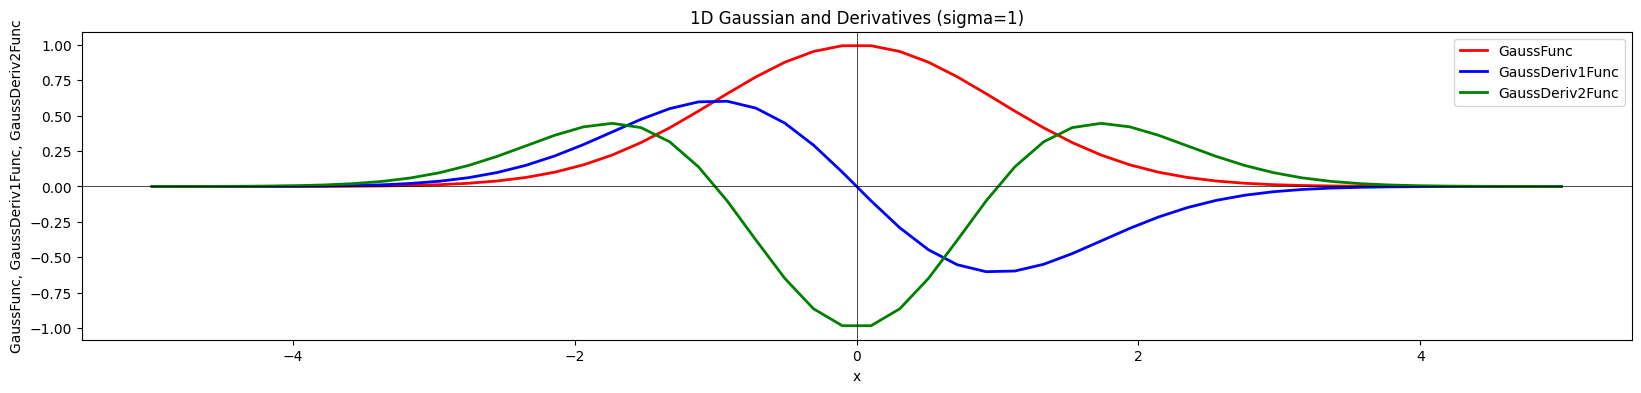

In [39]:
# Con la siguiente figura verificamos que las funciones Gaussianas implementadas son correctas
plt.figure()
xvalues = np.linspace(-5, 5)
yvalues1 = GaussFunc(xvalues,1)
yvalues2 = GaussDeriv1Func(xvalues,1)
yvalues3 = GaussDeriv2Func(xvalues,1)
plt.plot(xvalues, yvalues1, lw=2, color='red',
label='GaussFunc')
plt.plot(xvalues, yvalues2, lw=2, color='blue',
label='GaussDeriv1Func')
plt.plot(xvalues, yvalues3, lw=2, color='green',
label='GaussDeriv2Func')
plt.title('1D Gaussian and Derivatives (sigma=1)')
plt.xlabel('x')
plt.ylabel('GaussFunc, GaussDeriv1Func, GaussDeriv2Func')
plt.axhline(0, lw=0.5, color='black')
plt.axvline(0, lw=0.5, color='black')
plt.legend();

<font color="blue"> En la figura anterior vemos como efectivamente las funciones han sido implementadas correctamente.

<font color="blue">Una vez tenemos las funciones de Gauss, procedemos a crear la función para calcular las máscaras discretas 1D de la Gaussiana.

<font color="blue">Debemos tener en cuenta que el tamaño de la máscara viene condicionado por 3σ, siendo σ la desviación estándar, pues este valor abarca el 99.73% de valores de la gaussiana. Para poder discretizar correctamente, buscamos el mínimo valor de $k$ que satisfaga $k>=3\sigma$. Con ello conseguimos que la discretización represente casi toda la distribución, sin desperdiciar demasiado cálculo en zonas donde la Gaussiana ya es prácticamente cero


<font color="blue">El tamaño final de nuestra máscara será $T=2k+1$, ya que la máscara está compuesta por los valores: $[f(-k), ..., f(-1),f(0),f(1), ..., f(k)]$

<font color="blue">Siguiendo la fórmula anterior, y sabiendo que $k=3σ$, podemos sacar las siguientes relaciones:

<font color="blue">$$
k = \frac{T-1}{2}
$$

<font color="blue">O en función de $σ$:
$$
\sigma = \frac{T-1}{6}
$$
<font color="blue">Y despejando $T$ en la igualdad anterior:

<font color="blue">$$
T = 6\sigma + 1
$$




<font color="blue">Una vez tenemos σ y K podemos discretizar la máscara aplicando la función gaussiana o sus derivadas.





In [40]:


def gaussianMask1D(sigma=0, sizeMask=0, order=0):

    if sizeMask==0: #para cuando el parámetro sizeMask no sea usado
       sizeMask = 2*int(3*sigma)+1
    elif sigma==0: #para cuando el parámetro sigma no sea usado
       sigma=(sizeMask -1)/6


    mask = np.zeros(sizeMask) #inicializamos la máscara

    # order = 0 -> función Gaussiana
    if order==0:
      for i in range(len(mask)):
        mask[i]=GaussFunc(i-sizeMask//2,sigma)

    # order = 1 -> derivada de la Gaussiana
    elif order==1:
       for i in range(len(mask)):
        mask[i]=GaussDeriv1Func(i-sizeMask//2,sigma)

    # order = 2 -> derivada segunda de la Gaussiana
    elif order==2:
       for i in range(len(mask)):
        mask[i]=GaussDeriv2Func(i-sizeMask//2,sigma)

    return mask

<font color="blue">Para comprobar que la implementación de esta discretización es correcta, probaremos en primer lugar fijar el tamaño de la máscara y después fijaremos el σ, comprobando que las gráficas tengan la forma correcta.

FIJAMOS PRIMERO EL TAMAÑO DE LA MÁSCARA


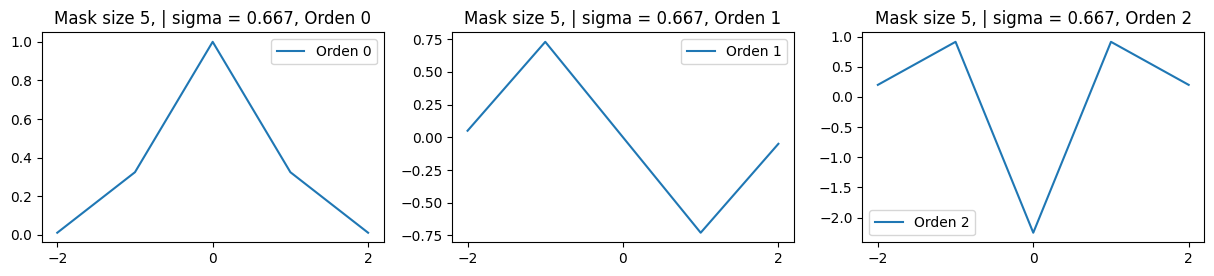

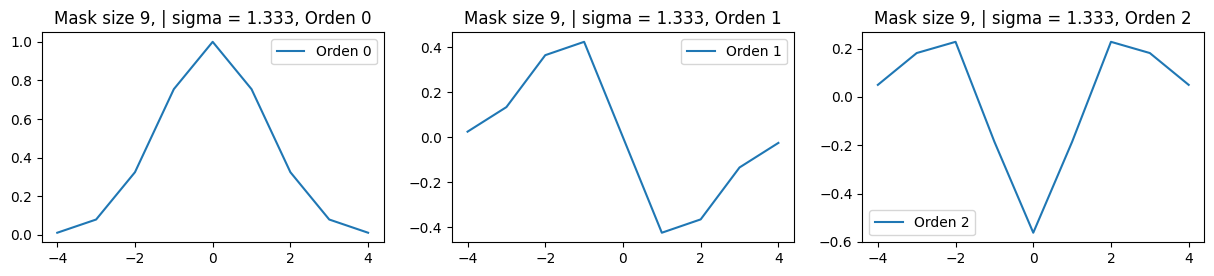

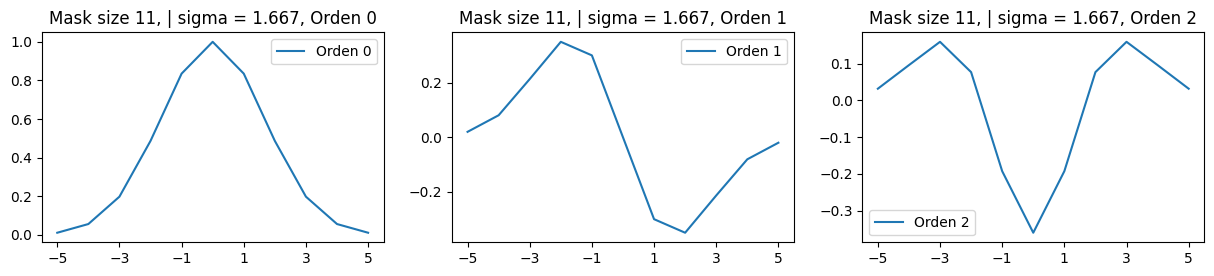

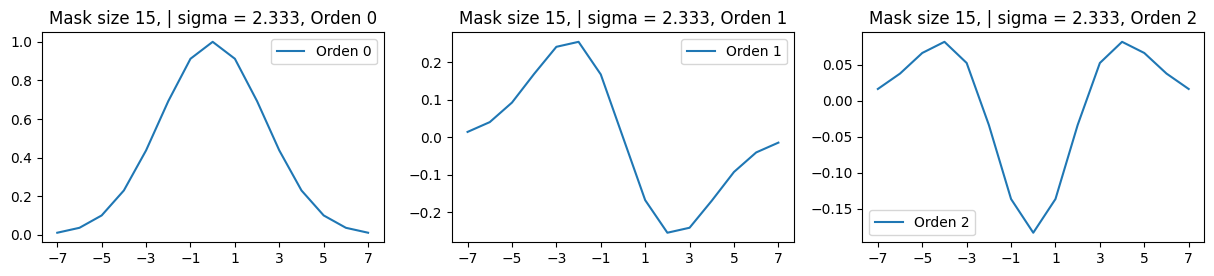

FIJAMOS AHORA EL SIGMA


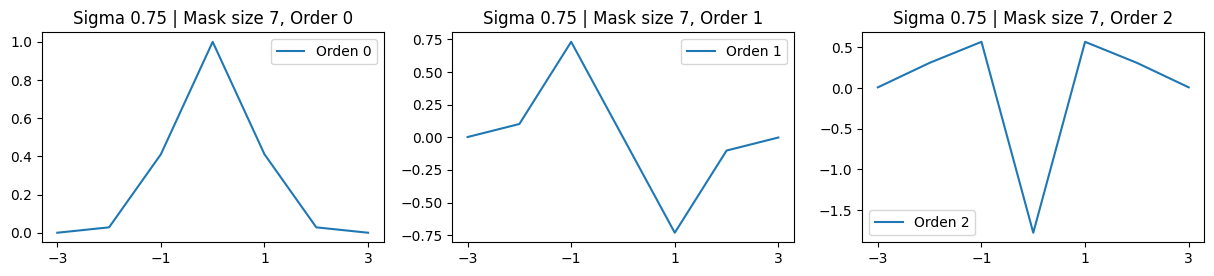

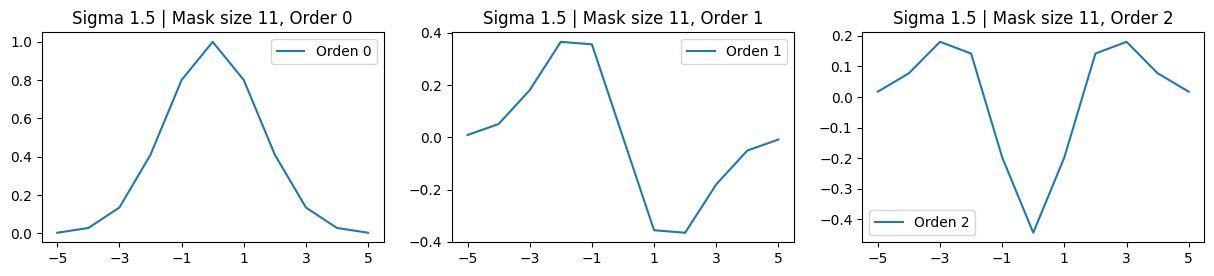

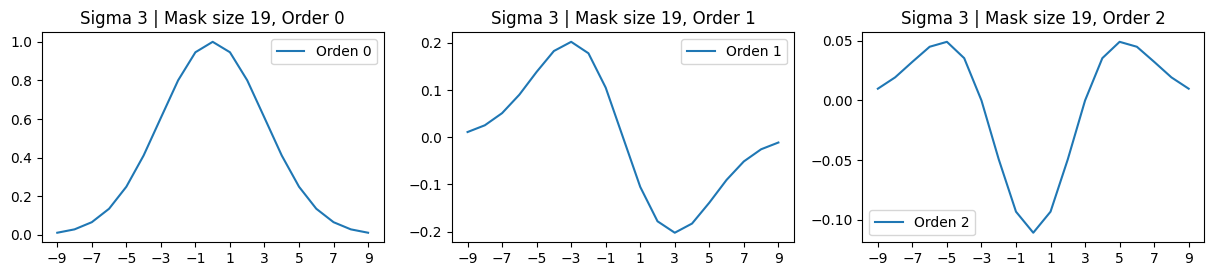

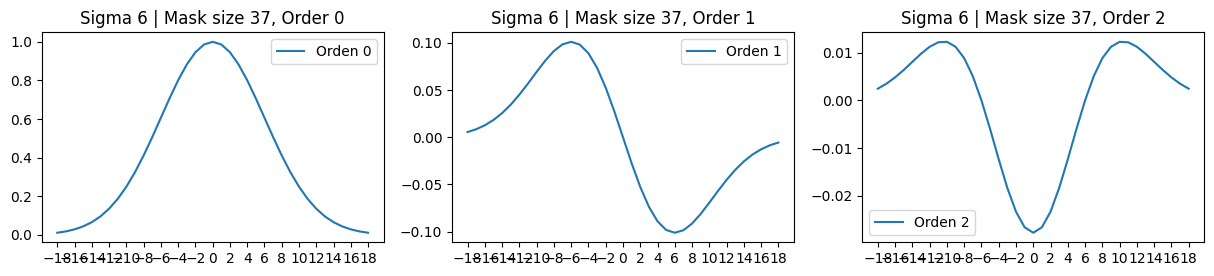

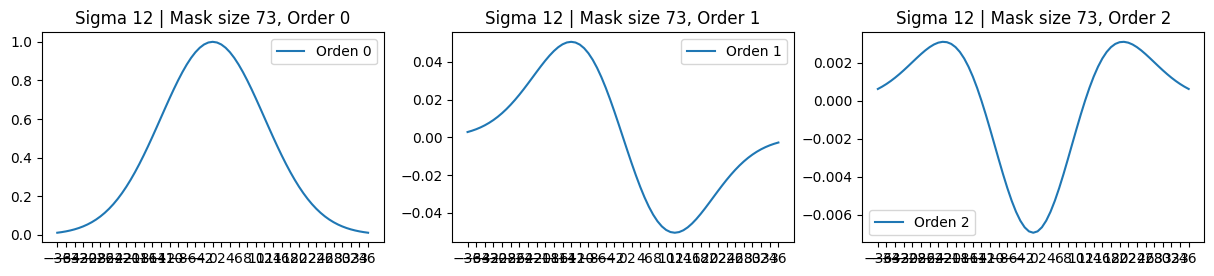

In [41]:
sigma_values = [0.75, 1.5, 3, 6, 12]
size_masks = [5, 9, 11, 15]

plt.rcParams["figure.figsize"] = (15, 6)  # para ajustar tamaño del ancho y alto (ejes)

print('FIJAMOS PRIMERO EL TAMAÑO DE LA MÁSCARA')
for sizeMask in size_masks:
    sigma=round((sizeMask -1)/6,3)
    plt.figure()
    k_valores = np.arange(sizeMask) - sizeMask // 2
    # Display each order individually in a row
    for i in range(3):
        mask = gaussianMask1D(sizeMask=sizeMask, order=i)
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, current plot is i+1
        plt.plot(k_valores,mask, label=f'Orden {i}')
        plt.title(f'Mask size {sizeMask}, | sigma = {sigma}, Orden {i}')
        plt.legend()
        ticks_de_2 = k_valores[::2]
        plt.xticks(ticks_de_2, fontsize=10) # <-- Muestra todos los valores de k en el eje x
    plt.show()


print('FIJAMOS AHORA EL SIGMA')
for sigma in sigma_values:
    sizeMask=2*int(3*sigma)+1
    plt.figure()
    k_valores = np.arange(sizeMask) - sizeMask // 2

    # Display each order individually in a row
    for i in range(3):
        mask = gaussianMask1D(sigma=sigma, order=i)
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, current plot is i+1
        plt.plot(k_valores,mask, label=f'Orden {i}')
        plt.title(f'Sigma {sigma} | Mask size {sizeMask}, Order {i}')
        plt.legend()
        ticks_de_2 = k_valores[::2]
        plt.xticks(ticks_de_2, fontsize=10)   # <-- Muestra todos los valores de k en el eje x
    plt.show()

<font color="blue">Si bien los valores en el eje X concuerdan con los que se nos otorgaron en el cuadernillo, los valores de Y si son distintos. Esto se debe a que en nuestro caso aún no hemos aplicado la normalización. Si comparamos la máscara obtenida con nuestra función a la obtenida mediante open cv veremos esta diferencia (A continuación he usado IA generativa para crear el código para comparar mis funciones con las de open CV) :

Comparing with OpenCV getGaussianKernel (Fixed Mask Size)


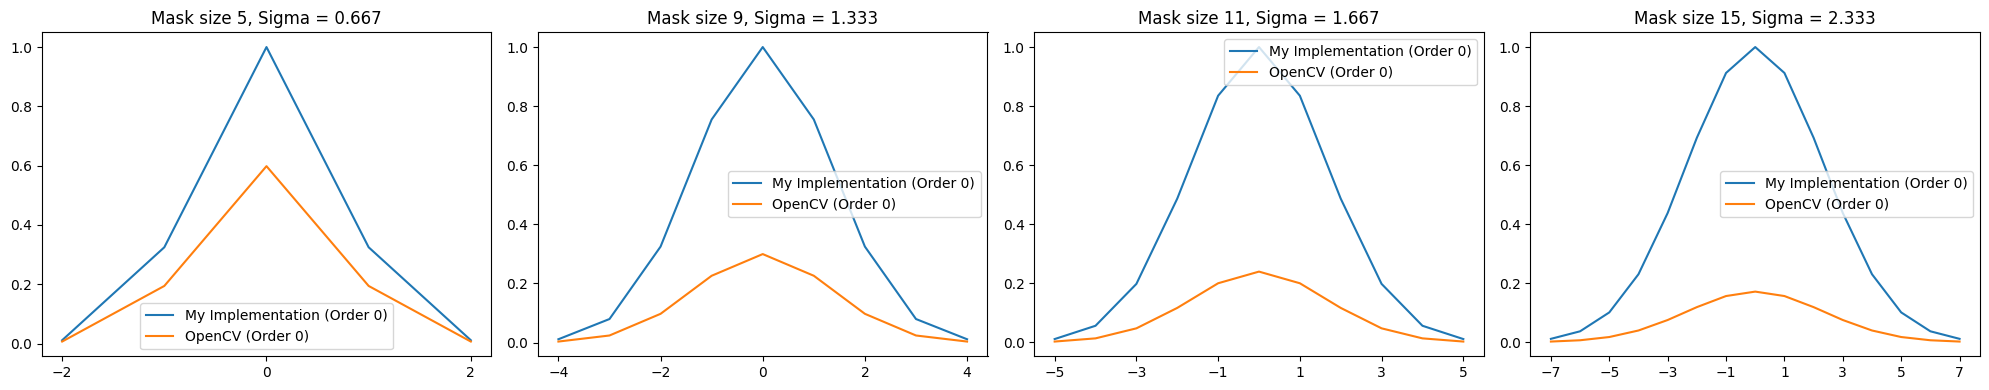

Comparing with OpenCV getGaussianKernel (Fixed Sigma)


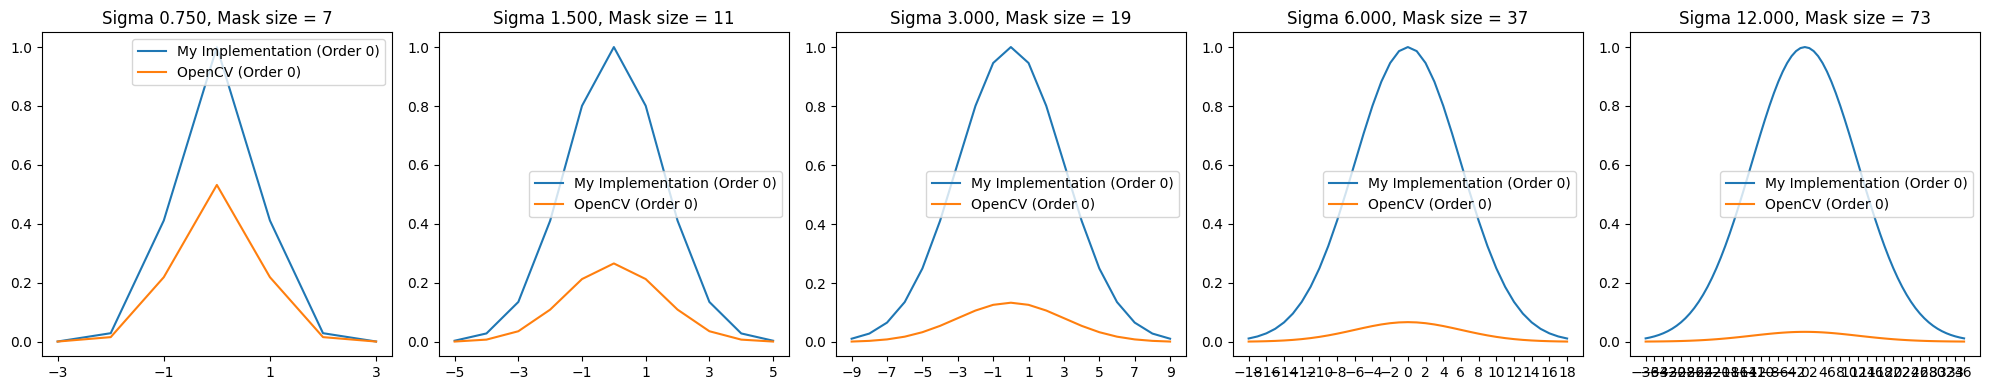

In [42]:
sigma_values = [0.75, 1.5, 3, 6, 12]
size_masks = [5, 9, 11, 15]

plt.rcParams["figure.figsize"] = (20, 4) # Adjust figure size for 1x5 grid

print('Comparing with OpenCV getGaussianKernel (Fixed Mask Size)')
plt.figure()
for i, sizeMask in enumerate(size_masks):
    sigma = (sizeMask - 1) / 6.0
    k_valores = np.arange(sizeMask) - sizeMask // 2

    # Display user's implementation and OpenCV's for Order 0 (Gaussian) in a subplot
    plt.subplot(1, len(size_masks), i + 1) # 1 row, len(size_masks) columns, current plot is i+1
    mask_user = gaussianMask1D(sizeMask=sizeMask, order=0)
    mask_opencv = cv2.getGaussianKernel(sizeMask, sigma).flatten()

    plt.plot(k_valores, mask_user, label='My Implementation (Order 0)')
    plt.plot(k_valores, mask_opencv, label='OpenCV (Order 0)')
    plt.title(f'Mask size {sizeMask}, Sigma = {sigma:.3f}')
    plt.legend()
    plt.xticks(k_valores[::2], fontsize=10)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


print('Comparing with OpenCV getGaussianKernel (Fixed Sigma)')
plt.figure()
for i, sigma in enumerate(sigma_values):
    sizeMask = 2 * int(3 * sigma) + 1
    k_valores = np.arange(sizeMask) - sizeMask // 2

    # Display user's implementation and OpenCV's for Order 0 (Gaussian) in a subplot
    plt.subplot(1, len(sigma_values), i + 1) # 1 row, len(sigma_values) columns, current plot is i+1
    mask_user = gaussianMask1D(sigma=sigma, order=0)
    mask_opencv = cv2.getGaussianKernel(sizeMask, sigma).flatten()

    plt.plot(k_valores, mask_user, label='My Implementation (Order 0)')
    plt.plot(k_valores, mask_opencv, label='OpenCV (Order 0)')
    plt.title(f'Sigma {sigma:.3f}, Mask size = {sizeMask}')
    plt.legend()
    plt.xticks(k_valores[::2], fontsize=10)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

<font color="blue">Para solucionarlo, basta con multiplicar nuestra máscara con la sumatoria de los valores de la misma:

Comparing with OpenCV getGaussianKernel (Fixed Mask Size)


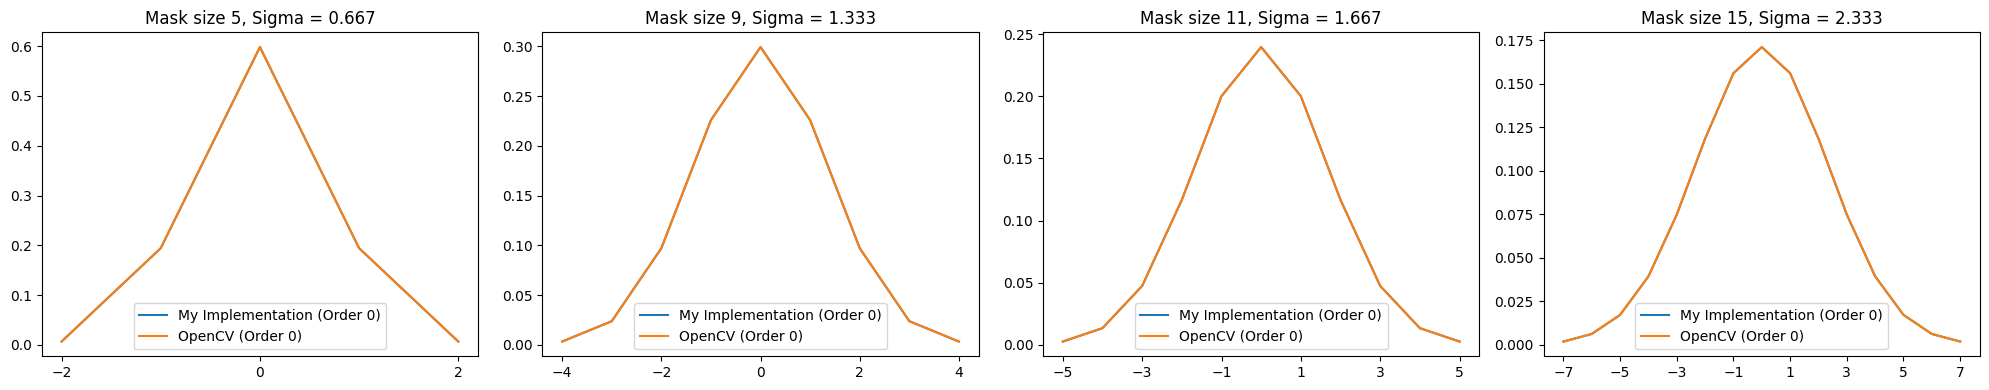

Comparing with OpenCV getGaussianKernel (Fixed Sigma)


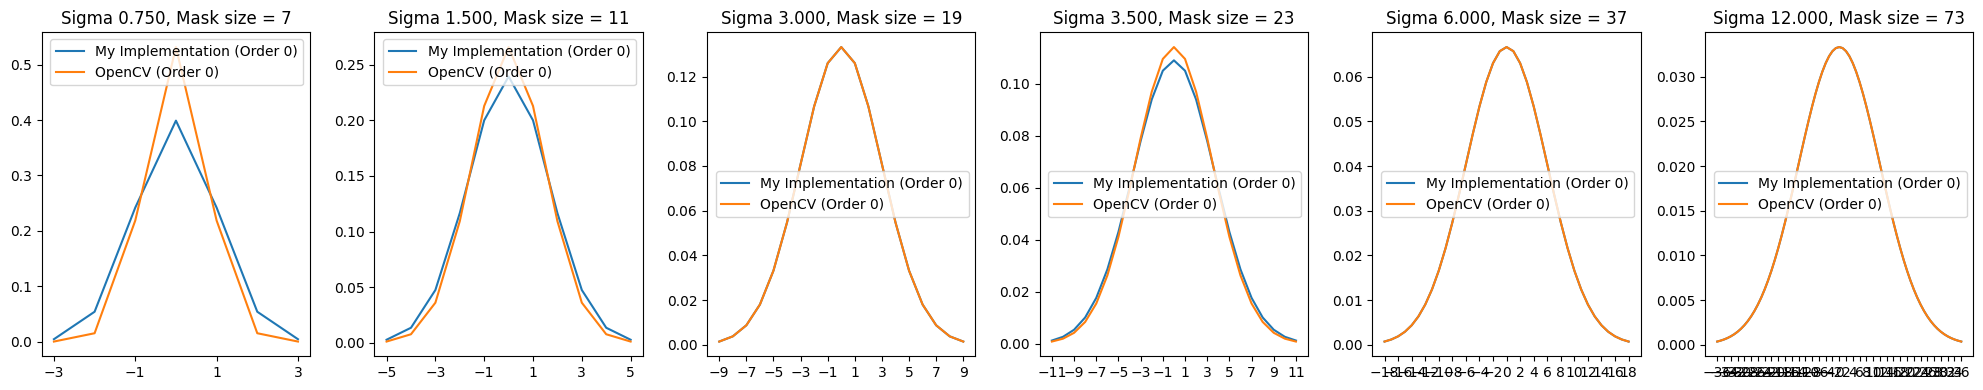

In [43]:
sigma_values = [0.75, 1.5, 3, 3.5,  6, 12]
size_masks = [5, 9, 11, 15]

plt.rcParams["figure.figsize"] = (20, 4) # Adjust figure size for 1x5 grid

print('Comparing with OpenCV getGaussianKernel (Fixed Mask Size)')
plt.figure()
for i, sizeMask in enumerate(size_masks):
    sigma = (sizeMask - 1) / 6.0
    k_valores = np.arange(sizeMask) - sizeMask // 2

    # Display user's implementation and OpenCV's for Order 0 (Gaussian) in a subplot
    plt.subplot(1, len(size_masks), i + 1) # 1 row, len(size_masks) columns, current plot is i+1
    mask_user = gaussianMask1D(sizeMask=sizeMask, order=0)
    coef_normal = 1/(mask_user.sum())
    mask_opencv = cv2.getGaussianKernel(sizeMask, sigma).flatten()

    plt.plot(k_valores, coef_normal*mask_user, label='My Implementation (Order 0)')
    plt.plot(k_valores, mask_opencv, label='OpenCV (Order 0)')
    plt.title(f'Mask size {sizeMask}, Sigma = {sigma:.3f}')
    plt.legend()
    plt.xticks(k_valores[::2], fontsize=10)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


print('Comparing with OpenCV getGaussianKernel (Fixed Sigma)')
plt.figure()
for i, sigma in enumerate(sigma_values):
    sizeMask = 2 * int(3 * sigma) + 1
    k_valores = np.arange(sizeMask) - sizeMask // 2

    # Display user's implementation and OpenCV's for Order 0 (Gaussian) in a subplot
    plt.subplot(1, len(sigma_values), i + 1) # 1 row, len(sigma_values) columns, current plot is i+1
    mask_user = gaussianMask1D(sizeMask=sizeMask, order=0)
    coef_normal = 1/(mask_user.sum())
    mask_opencv = cv2.getGaussianKernel(sizeMask, sigma).flatten()

    plt.plot(k_valores, coef_normal*mask_user, label='My Implementation (Order 0)')
    plt.plot(k_valores, mask_opencv, label='OpenCV (Order 0)')
    plt.title(f'Sigma {sigma:.3f}, Mask size = {sizeMask}')
    plt.legend()
    plt.xticks(k_valores[::2], fontsize=10)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

<font color="blue"> Como podemos ver, ya si coinciden en mayor medida que antes. Sin embargo, por cuestiones de implementación, si el sigma que se pasa como argumento no es un entero, hay algo de imprecisión (porque al calcular el tamaño de la máscara, si el sigma no era entero se hace una aproximación con la que se pierde información). A mayor valor de sigma este error se aminora, podemos ver la diferencia entre el sigma de 1.5 al de 3.5, como el de 3.5 se adapta bastante mejor que el de sigma 1.5.

## B) (1.5 puntos)

En este apartado se debe leer una imagen en escala de grises (`'motorcycle.bmp'`) y esta debe ser filtrada mostrando el resultado de la convolución con: a) una Gaussiana, b) la primera derivada de la Gaussiana en $X$, c) la primera derivada de la Gaussian en $Y$, d) la segunda derivada de la Gaussiana en $X$, y e) la segunda derivada de la Gaussiana en $Y$. Para ello, hay que:
1. emplear los siguientes sigmas ($\{0.75,1.5,3,6, 12\}$),
2. usar la función de OpenCV `sepFilter2D()` con las máscaras calculadas a partir de las funciones desarrolladas en el apartado anterior,
3. mostrar todas las imágenes dentro del mismo canvas, tal y como se muestra más abajo,
4. analizar los resultados obtenidos y discutir si se corresponden con lo se esperaría obtener en base a nuestro conocimiento de la teoría.




In [44]:
def my2DConv(im, sigma, orders):
  #A CUBRIR POR EL ALUMNADO
  if orders==[0,0]: # Suavizado Gaussiano
    return #A CUBRIR POR EL ALUMNADO
  elif #A CUBRIR POR EL ALUMNADO
  else:
    print('Error en el orden de la derivada')

sigmas = #A CUBRIR POR EL ALUMNADO


im=cv2.imread(get_image('motorcycle.bmp'),0)

vim0=[]
orders=[0,0]
for sigma in sigmas:
  vim0.append(rangeDisplay01(my2DConv(im,sigma,orders),True))

#A CUBRIR POR EL ALUMNADO
displayMI_ES(vim0,'Suavizado Gaussiano',2)
#A CUBRIR POR EL ALUMNADO



SyntaxError: invalid syntax (ipython-input-1340438177.py, line 5)

## C) (1 punto)

En este apartado hay que emplear la función `my2DConv()`, creada en el apartado anterior (y que, a su vez, emplea la función de OpenCV `sepFilter2D()`) con $\sigma=1.0$ para calcular y mostrar el gradiente (2 imágenes: magnitud y orientación) y la Laplaciana de la Gaussiana. Se debe explicar el trabajo realizado, incluyendo las expresiones matemáticas subyacentes y el análisis, al igual que en todos los ejercicios, relativo a si los resultados obtenidos se corresponden con lo esperado. Se emplea la misma imagen del apartado anterior: `motorcycle.bmp`

In [ ]:
def gradientIM(im,sigma):
  #A CUBRIR POR EL ALUMNADO
  return dx,dy

def laplacianG(im,sigma):
  return #A CUBRIR POR EL ALUMNADO

#A CUBRIR POR EL ALUMNADO

## D) (1.5 puntos)  

Implemente una función para realizar "a mano" la convolución separable (es decir, empleando kernels 1D). Dicha función debe recibir como entrada una imagen (con el _padding_ adecuado, en caso de que lo necesite, ya incorporado) y un kernel 1D, y debe proporcionar como salida la imagen convolucionada con el kernel en ambas direcciones. Es decir, el hecho de introducir, o no, padding es un elemento externo a la función de convolución que lo único que hace es realizar la convolución separable encajando el kernel hasta el límite de la imagen de entrada.

Una vez haya implementado la función, aplique un kernel de derivadas en $X$ a la imagen `zebra.jpg` (usando los kernels de tamaño $5$, generados por nuestras funciones del Ejercicio $1$, y dejando que sea la propia función de creación del kernel la que determine el $\sigma$ adecuado), y compare el resultado con el de `cv2.Sobel` (en donde se debe optar por la misma estrategia: fijando $ksize=5$ y dejando que sea la propia función de OpenCV la que escoja el sigma). ¿Hay diferencias (sea a nivel de resultado final o de tiempo de ejecución)? En caso afirmativo, ¿a qué se pueden deber?

**Nota**: el código del alumnado no puede ser más de $50$ veces más lento que el de OpenCV. Ese es el límite superior aceptable. Se debe optimizar la ejecución para, al menos, estar en ese orden de magnitud comparativamente con el rendimiento ofrecido por OpenCV. Estos tiempos de ejecución se deben medir usando:

```python
starttime = time.perf_counter()
# CÓDIGOS DE CONVOLUCIÓN
duration = timedelta(seconds=time.perf_counter() - starttime)
```


In [ ]:
def convolve1D(image,kernel):
    #A CUBRIR POR EL ALUMNADO
    return output

def convolve2D(image, kx, ky):
    #A CUBRIR POR EL ALUMNADO

    return #A CUBRIR POR EL ALUMNADO

# **Ejercicio 2**:  Pirámides Gaussianas y Laplacianas (4.5 puntos)







## A) (1 punto)

Construya una pirámide Gaussiana de $5$ niveles empleando máscaras Gaussianas de tamaño $5\times5$. No se permite emplear las funciones `pyrUp()` y `pyrDown()` de OpenCV. `cv2.resize()` no se puede emplear a la hora de crear la pirámide Gaussiana (apartado A), pero sí a la hora de crear la pirámide Laplaciana (apartado B) y cuando se reconstruye la imagen original a partir de esta última pirámide (apartado C). En todos los apartados de este ejercicio se debe emplear la imagen `einstein.bmp`.

In [ ]:
'''
This function displays a pyramid of images, providing as input the list of images to display.

Example of use:
im1=readIm(get_image('apple.jpg'),1)
images = [im1, cv2.resize(im1,(im1.shape[0]//2,im1.shape[1]//2),cv2.INTER_LINEAR), cv2.resize(im1,(im1.shape[0]//4,im1.shape[1]//4),cv2.INTER_LINEAR), cv2.resize(im1,(im1.shape[0]//8,im1.shape[1]//8),cv2.INTER_LINEAR), cv2.resize(im1,(im1.shape[0]//16,im1.shape[1]//16),cv2.INTER_LINEAR)]

displayPyramid(images, title='Piramide de Manzanas')

'''
def displayPyramid(vim, title='result'):
  temp = np.zeros_like(vim[0])
  if np.mod(temp.shape[1],2)==0:
    h = temp[:, :temp.shape[1]//2]
  else:
    h = temp[:, :(temp.shape[1]//2)+1]
  out = np.hstack((temp, h))
  top = 0
  out[0:vim[0].shape[0], 0:vim[0].shape[1]] = vim[0]
  left = vim[0].shape[1]
  for i in range(1, len(vim)):
    out[top:top+vim[i].shape[0], left:left + vim[i].shape[1]] = vim[i]
    top += vim[i].shape[0]
  displayIm(out, title)

In [ ]:
def pyramidGauss(im,sizeMask=7, nlevel=4):
  #A CUBRIR POR EL ALUMNADO
  return #A CUBRIR POR EL ALUMNADO

im=cv2.imread(get_image('einstein.bmp'),0)
pyrG = pyramidGauss(im,sizeMask=7, nlevel=4)
displayPyramid(pyrG,'Gaussian Pyramid')


## B) (1 punto)

Use su código del apartado anterior para implementar una función que permita construir una pirámide Laplaciana de $5$ niveles.

In [ ]:
def pyramidLap(im, sizeMask,nlevel=4,flagInterp=cv2.INTER_LINEAR  ):
  #A CUBRIR POR EL ALUMNADO
  return #A CUBRIR POR EL ALUMNADO

#A CUBRIR POR EL ALUMNADO

## C) (1 punto)

Implemente ahora una función para reconstruir la imagen codificada en la pirámide Laplaciana del apartado 2.B. Verifique que es posible obtener una copia exacta de la imagen original. Para ello, calcule el error de reconstrucción como el _Root Mean Squared Error_ (RMSE) entre los niveles de intensidad de la imagen original y la imagen reconstruida.

In [ ]:
def reconstructLap(pyL,flagInterp):
  #A CUBRIR POR EL ALUMNADO
  return #A CUBRIR POR EL ALUMNADO

im=cv2.imread(get_image('einstein.bmp'),0)
#A CUBRIR POR EL ALUMNADO
print('Error per pixel',np.sqrt(np.mean((im - np.round(recons)) ** 2)))

## D) (1.5 puntos)

### APARTADO 1 (0.5 puntos)

Imaginemos que tenemos una implementación en donde, a la hora de construir la pirámide Laplaciana, cada nivel lo introducimos normalizado, es decir, empleamos `rangeDisplay01()` antes de introducir el nivel generado en el listado de imágenes que conforman la pirámide Laplaciana. ¿Qué influencia puede tener a la hora de reconstruir la imagen original? ¿Considera que sería una práctica adecuada?

### APARTADO 2 (0.5 puntos)

Imaginemos ahora que no expandimos de la misma forma al crear la pirámide Laplaciana y al reconstruir la imagen original. En el primer caso, usamos `cv2.resize()`, con `cv2.INTER_LINEAR`, mientras que en el segundo usamos `cv2.pyrUp()`. ¿Esto afecta a la reconstrucción de alguna forma o no? ¿Por qué?

### APARTADO 3 (0.5 puntos)

Las herramientas de IA generativa son de gran utilidad tanto para estudiantes como para docentes. No obstante, resulta fundamental tener una actitud crítica y asumir desde el principio que las respuestas proporcionadas por estas herramientas pueden ser factualmente incorrectas (véase,  por ejemplo, https://elpais.com/tecnologia/2024-09-25/los-nuevos-modelos-de-ia-como-chatgpt-persiguen-la-superinteligencia-pero-no-logran-ser-fiables-ni-en-preguntas-bobas.html o https://maldita.es/malditobulo/20250827/grok-identifica-mal-fotografia-franquismo/). En este sentido, vale la pena recordar lo que indica la guía de la UGR (https://ceprud.ugr.es/formacion-tic/inteligencia-artificial): _"Debes revisar siempre la salida que genera y las posibles referencias que utilice. [...] Mejora tus resultados con la IAGen aprendiendo a usarla y a comunicarte con ella de manera adecuada. Pero no dejes que piense por ti."_

En este apartado trabajaremos de forma crítica la utilidad de estas herramientas. Para ello, el alumnado debe emplear ChatGPT (https://chatgpt.com/) para analizar si es posible reconstruir a la perfección (`Error per pixel 0.0`) la imagen original por medio de una pirámide Laplaciana construida a partir de una pirámide Gaussiana sin suavizado (es decir, una pirámide no realmente Gaussiana, construida exclusivamente en base a hacer subsampling). Deben indicarse tanto los prompts empleados, como los razonamientos o experimentos llevados a cabo para concluir si lo que la herramienta de IA afirmaba era correcto o no. Muy importante: no se trata meramente de copiar lo que indique ChatGPT como salida, sino de analizar y matizar su respuesta, confrontándola con otras lecturas y lo que el estudiante sabe de la teoría, indicando en qué aspectos dicha respuesta puede considerarse correcta y en qué aspectos quizás no lo es.

# **Ejercicio 3: Imágenes Híbridas** (1.5 puntos)

Este ejercicio se basa en el siguiente trabajo: $\textit{Oliva, A., Torralba, A., & Schyns, P. G. (2006). Hybrid images. ACM Transactions on Graphics (TOG), 25(3), 527-532}$ (https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf).

Vamos a profundizar un poco en cómo el sistema visual humano extrae información sobre un objeto en función de la distancia. Para ello, construimos una imagen híbrida a partir de dos imágenes de objetos diferentes. Mezclando adecuadamente parte de las altas frecuencias de una imagen con parte de las bajas frecuencias de la otra, obtenemos una imagen híbrida que muestra diferentes percepciones con la distancia.

El sigma empleado para filtrar ambas imágenes (tanto la de alta como la de bajas frecuencias) es el aspecto clave para seleccionar el rango de frecuencias altas y bajas de cada imagen. Cuanto mayor sea el valor sigma, mayor será la eliminación de altas frecuencias de la imagen. Se recomienda elegir este valor por separado para cada una de las imágenes y, de hecho, es deseable tener distintos valores para distintos pares de imágenes.

Aspectos de importancia en relación a este ejercicio:

1. Como mínimo, se deben generar las imágenes híbridas correspondientes a `'plane.bmp'+'bird.bmp'` y `'bicycle.bmp'+'motorcycle.bmp'` (ambas parejas en escala de grises). Y también el alumnado debe escoger, como mínimo, otro par de imágenes de su elección a hibridar en color, fuera de las incluidas en la carpeta compartida en Drive (https://drive.google.com/drive/folders/1UtvY8q6w1Cz9a9T9zxIqSweoRLgNwoW-). Es decir, como mínimo, debe haber $3$ pares de imágenes híbridas como parte de la respuesta a este ejercicio. Se debe emplear una pirámide Gaussiana con $5$ niveles para mostrar el efecto obtenido.

**Nota:** de cara a emplear imágenes que no estén en el repositorio compartido, se recomienda que el alumnado emplee un código como el que se muestra a continuación, y que permite descargar sobre la marcha imágenes a partir de una URL dada.






In [ ]:
import requests
def downloadImage(url):
    response = requests.get(url)
    img_array = np.frombuffer(response.content, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float64)/255
    return img
try:
    smiley_im = downloadImage("https://images.rawpixel.com/image_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIyLTA1L2ZsMTI5Mjk0MTAxNjUtaW1hZ2Uta3liZW9jNjEuanBn.jpg")
    plt.imshow(smiley_im)
except:
    print("Couldn't download the image from the given URL")

2. No es necesario seguir al pie de la letra el artículo de referencia y operar en el dominio de la frecuencia (Fourier). Basta con operar en el dominio del espacio, como hemos hecho en todos los demás apartados de esta práctica. No obstante, sí se debe emplear/buscar algún criterio objetivable/cuantificable a la hora de escoger qué imagen se empleará para las altas frecuencias y cuál para las bajas frecuencias. No basta con escogerla "a ojo" y, al contrario, se debe definir alguna métrica que permita realizar la selección.

3. En relación con el punto anterior, se debe explicar con claridad el proceso seguido para filtrar la imagen de altas frecuencias y la de bajas frecuencias, incluyendo la elección de los sigmas finalmente utilizados. La realización de una experimentación preliminar, por medio de prueba y error, es perfectamente válida, pero hay que explicarla y justificarla de algún modo. No basta con probar una serie de valores arbitrarios y justificarlo, sucintamente, indicando que *"se procedió por medio de prueba y error hasta obtener el sigma final"*.

In [ ]:
#A CUBRIR POR EL ALUMNADO

# **Ejercicio 4: Canny Edge Detector** (1.5 puntos)

En este ejercicio se debe implementar el algoritmo de detección de bordes de Canny y evaluarlo con la imagen `cat.bmp`. Para ello, se deben emplear las funciones definidas hasta ahora en los ejercicios anteriores (de generación de kernels Gaussianos y convolución separable) para:

1. **Suavizar la imagen de entrada** para reducir el impacto del ruido. Se debe definir un $sigmaS$, que controlará el grado de suavizado de la imagen de entrada, cuyo valor debe ajustarse adecuadamente.

2. Ahora debemos filtrar la imagen con derivadas de la Gaussiana, y **calcular la magnitud y orientación del gradiente**. Los códigos del ejercicio 1.C nos servirán de gran utilidad a este respecto. Es importante destacar que la orientación que queremos calcular debe estar en $[0,180)$ grados en lugar de $[0,360]$, dado que el gradiente de un borde no tiene una dirección específica en el sentido de "ida y vuelta". Es decir, lo que nos importa es la orientación del borde, y no el sentido del flujo de píxeles a través de él. Se debe definir un $sigmaG$, cuyo valor debe ajustarse adecuadamente.

3. ***Non-maximum suppression***. Este es uno de los elementos clave del algoritmo. En aras de simplificar y acelerar la ejecución de nuestra implementación, lo primero que hacemos es emplear $4$ posibles clusters de ángulos ($0$, $45$, $90$, $135$) a través del siguiente *mapping*:
```
    [0,22.5) U [157.5,180) -> sector 0
    [22.5,67.5) -> sector 45
    [67.5,112.5) -> sector 90
    [112.5,157.5) -> sector 135
```
De esta manera estamos discretizando los valores de los posibles ángulos/direcciones de cada pixel. Recordemos que la dirección del gradiente es perpendicular al borde. De modo que un píxel perteneciente a un borde vertical tendría un gradiente con orientación $0º$. A continuación, debemos seleccionar los vecinos de cada píxel basándonos en su orientación:
- si dicho píxel pertenece al sector de $0º$, lo compararemos con su vecino izquierdo y derecho.
- si dicho píxel pertenece al sector de $45º$, lo compararemos con su vecino de arriba a la derecha y de abajo a la izquierda.
- si dicho píxel pertenece al sector de $90º$, lo compararemos con su vecino de arriba y de abajo.
- si dicho píxel pertenece al sector de $135º$, lo compararemos con su vecino de arriba a la izquierda y de abajo a la derecha.

Y, en todos los casos, si el píxel tiene mayor magnitud que sus vecinos, nos lo quedaremos (de lo contrario, lo ignoraremos y no pasará a la siguiente etapa).

Con el fin de obtener una implementación de eficiencia razonable, cuyo tiempo de ejecución no difiera notablemente del que ofrece OpenCV, se plantea la siguiente alternativa (que se plantea, en todo caso, como una mera sugerencia, dado que el alumnado tiene libertad para escoger su propia solución):  

- Construir todas las matrices de vecinos (`up`, `down`, `left`, `right`,  `up_left`, etc.) a partir de la imagen de magnitudes original. Y, para realizar las comparaciones, se deben utilizar estos arrays directamente. Es decir, se recomienda emplear operaciones vectorizadas y rehuir de bucles `for` en la medida de lo posible.

- Para cada sector, la decisión de "mantener/descartar" un píxel depende solo de la magnitud del gradiente original y de las dos entradas vecinas precomputadas. No se debe modificar ni la magnitud del gradiente ni los vecinos durante la iteración. De este modo, por ejemplo, procesar el sector $0$ antes o después de sector $45$ no cambia nada.

4. **Umbralización e histéresis**. Se definen dos umbrales ($low$ y $high$). Tras el *non-maxima suppression*, nos interesa quedarnos los píxeles con valores iguales o mayores que $high$. También nos interesa descartar los que sean menores que $low$. Ahora aplicamos la histéresis, que se basa en "promover a fuerte todo píxel débil que esté conectado por una cadena de píxeles débiles (o fuertes) a un píxel fuerte". Para implementar esta sección se recomienda emplear `cv2.connectedComponents()` con `connectivity=8`. Pensemos que, si una componente conexa contiene al menos un píxel $strong$, entonces toda la componente conexa estará conectada/encadenada a dicho píxel.

Una vez haya finalizado la implementación, verifique el comportamiento del algoritmo estudiando cómo varían las salidas si se modifican los umbrales $low$, $high$, $sigmaS$ y $sigmaG$.





In [ ]:

import cv2
import numpy as np

def gradient_and_angle(img, sigmaG):
    #A CUBRIR POR EL ALUMNADO
    return dx, dy, mag, orient

In [ ]:
def non_maximum_suppression(mag, ang):
    #A CUBRIR POR EL ALUMNADO

    return output



In [ ]:
def double_threshold_and_hysteresis_fast(nms, low, high):
    #A CUBRIR POR EL ALUMNADO
    return out


In [ ]:
def my_canny(img, low_thresh, high_thresh, sigmaGradient, sigmaSmoothing):
    #A CUBRIR POR EL ALUMNADO
    return nms, edges



img=cv2.imread(get_image('cat.bmp'),0).astype(np.float32)
low = #A CUBRIR POR EL ALUMNADO
high = #A CUBRIR POR EL ALUMNADO
sigmaG = #A CUBRIR POR EL ALUMNADO
sigmaS = #A CUBRIR POR EL ALUMNADO
nms, edges = my_canny(img, low_thresh=low, high_thresh=high, sigmaGradient=sigmaG, sigmaSmoothing = sigmaS)

displayMI_ES([rangeDisplay01(img), rangeDisplay01(edges)], title='Original vs Mi Implementación de Canny')